# numpy primer: exploits a text to estimate word frequencies

In [1]:
import numpy as np
from tqdm.notebook import tqdm

In [2]:
with open('words/i_promessi_sposi.txt', 'r', encoding='latin-1') as infile:
    ps_text = infile.read()

## Document-word matrix
Given the complete vocabulary $D$ of size $d$ of a text composed by $s$ sentences, we want to represent the relation between words and sentences as a matrix $M \in \mathbb{Z}_{\geq 0}^{s \times d}$, where $M_{i,j}$ represents the number of occurrences of the $j$th word in the $i$th sentence.

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [4]:
words = word_tokenize(ps_text, language='italian')

In [5]:
freq = {}
for word in tqdm(words):
    try:
        freq[word.lower()] += 1
    except KeyError:
        freq[word.lower()] = 1

In [6]:
wordlist, freqlist = [], []
for k, v in freq.items():
    wordlist.append(k)
    freqlist.append(v)

In [7]:
pos = dict([(w, i) for i, w in enumerate(wordlist)])

In [8]:
wf = np.array(freqlist)

In [9]:
S = [s for s in sent_tokenize(ps_text, language='italian')]

In [10]:
M = np.zeros((len(S), len(wordlist)))

In [11]:
for i, sentence in tqdm(enumerate(S)):
    for word in word_tokenize(sentence, language='italian'):
        try:
            word_pos = pos[word.lower()]
            M[i, word_pos] += 1
        except KeyError:
            pass

In [12]:
o = M.sum(axis=0)
word_to_save = [i for i, w in enumerate(o) if w > 1]

In [13]:
X = M[:,word_to_save]

In [14]:
X.shape

(9804, 9937)

In [15]:
wlist = [w for i, w in enumerate(wordlist) if i in word_to_save]

In [16]:
len(wlist)

9937

In [17]:
def query(text, X, wlist):
    q = np.zeros(X.shape[1])
    tokens = [x.lower() for x in 
              word_tokenize(text, language='italian') 
              if x.lower() in wlist]
    for token in tokens:
        q[wlist.index(token)] += 1
    return q    

In [18]:
query('il lago di como è un ampio bacino acquatico collocato fra le montagne nei pressi di milano', X, wlist)

array([0., 0., 0., ..., 0., 0., 0.])

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
q = query('il lago di como è un ampio bacino acquatico collocato fra le montagne nei pressi di milano', X, wlist)

In [21]:
sigma = cosine_similarity(q.reshape(1, -1), X)

In [23]:
q.reshape(1, -1).shape

(1, 9937)

In [24]:
X.shape

(9804, 9937)

In [25]:
sigma.shape

(1, 9804)

In [22]:
for k, (i, s) in enumerate(sorted(enumerate(sigma[0]), key=lambda x: -x[1])):
    print(i, s)
    print(S[i])
    print('\n')
    if k > 5:
        break

3330 0.4517539514526256
All'intorno era un batter di mani e di piedi, un frastono di mille grida di trionfo e d'imprecazione.


963 0.427960492510913
Le anticamere, il cortile e la strada formicolavan di servitori, di paggi, di bravi e di curiosi.


5608 0.4187178946793119
Di maniera che gli parve un sollievo il tornare a quella prima immagine di Lucia, contro la quale aveva cercato di rinfrancare il suo coraggio. "


774 0.4029114820126901
Un bel mucchio di foglie secche di noce.


7168 0.3988620176087328
Le usciva di bocca dell'erba mezza rosicchiata, e le labbra facevano ancora quasi un atto di sforzo rabbioso...


1129 0.3909001065607714
Quivi un gran frastono confuso di forchette, di coltelli, di bicchieri, di piatti, e sopra tutto di voci discordi, che cercavano a vicenda di soverchiarsi.


5159 0.39036002917941326
Il fondo è un letto di ciottoloni, dove scorre un rigagnolo o torrentaccio, secondo la stagione: allora serviva di confine ai due stati.




## Get some stats from doc2terms matrix

In [26]:
import matplotlib.pyplot as plt

In [27]:
def sentence_values(doc2terms, sentence_id, words, threshold=0):
    out = {}
    for i, w in enumerate(doc2terms[sentence_id]):
        if w > threshold:
            out[words[i]] = w
    return sorted(out.items(), key=lambda x: -x[1])

def prints(sentence, stats):
    print(S[sentence], '\n')
    print("\t".join(["{} -> {}".format(k, round(v, 2)) for k, v in stats]))

In [28]:
sentence = 3634
stats = sentence_values(X, sentence, wlist)
prints(sentence, stats)

Il mio debol parere è questo: che non è solamente nell'affare del pane che si fanno delle bricconerie: e giacché oggi s'è visto chiaro che, a farsi sentire, s'ottiene quel che è giusto; bisogna andar avanti così, fin che non si sia messo rimedio a tutte quelle altre scelleratezze, e che il mondo vada un po' più da cristiani. 

che -> 6.0	è -> 4.0	, -> 4.0	: -> 2.0	a -> 2.0	e -> 2.0	non -> 2.0	' -> 2.0	il -> 2.0	si -> 2.0	questo -> 1.0	da -> 1.0	oggi -> 1.0	del -> 1.0	. -> 1.0	fanno -> 1.0	più -> 1.0	un -> 1.0	sia -> 1.0	quel -> 1.0	così -> 1.0	delle -> 1.0	mondo -> 1.0	mio -> 1.0	; -> 1.0	po -> 1.0	quelle -> 1.0	tutte -> 1.0	giacché -> 1.0	messo -> 1.0	parere -> 1.0	fin -> 1.0	farsi -> 1.0	s -> 1.0	andar -> 1.0	altre -> 1.0	avanti -> 1.0	giusto -> 1.0	chiaro -> 1.0	bisogna -> 1.0	sentire -> 1.0	rimedio -> 1.0	visto -> 1.0	vada -> 1.0	pane -> 1.0	cristiani -> 1.0	solamente -> 1.0	bricconerie -> 1.0	debol -> 1.0	nell'affare -> 1.0	s'ottiene -> 1.0	scelleratezze -> 1.0


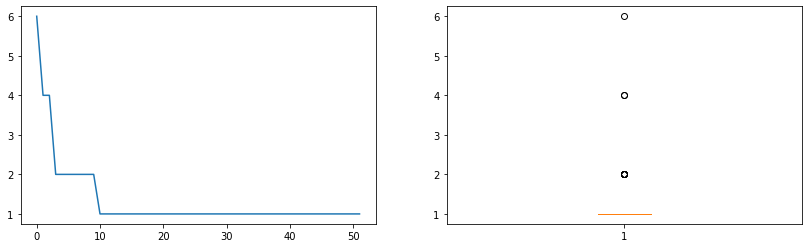

In [135]:
values = [y for _, y in stats]
fig, ax = plt.subplots(figsize=(14, 4), ncols=2)
ax[0].plot(values)
ax[1].boxplot(values)
plt.show()

## Tf-Idf
Given a term $t$ and a document $d$:

$$\textrm{Tf}(t, d) = k + (1-k) \frac{count(t, d)}{\max\limits_{t' \in d} count(t', d)}$$

$$\textrm{Idf}(t) = \log \frac{D}{\mid \{d_i : t \in d_i\} \mid}$$

$$\textrm{TfIdf}(t, d) = \textrm{Tf}(t, d)\textrm{Idf}(t)$$

### Get mx frequency per doc and calculate TF

In [33]:
(X.T / X.max(axis=1)).T

(9937, 9804)

In [35]:
k = 0
TF = k + (1-k) * (X.T / X.max(axis=1)).T

In [36]:
sentence = 3634
stats_tf = sentence_values(TF, sentence, wlist, threshold=0.0)
prints(sentence, stats_tf)

Il mio debol parere è questo: che non è solamente nell'affare del pane che si fanno delle bricconerie: e giacché oggi s'è visto chiaro che, a farsi sentire, s'ottiene quel che è giusto; bisogna andar avanti così, fin che non si sia messo rimedio a tutte quelle altre scelleratezze, e che il mondo vada un po' più da cristiani. 

che -> 1.0	è -> 0.67	, -> 0.67	: -> 0.33	a -> 0.33	e -> 0.33	non -> 0.33	' -> 0.33	il -> 0.33	si -> 0.33	questo -> 0.17	da -> 0.17	oggi -> 0.17	del -> 0.17	. -> 0.17	fanno -> 0.17	più -> 0.17	un -> 0.17	sia -> 0.17	quel -> 0.17	così -> 0.17	delle -> 0.17	mondo -> 0.17	mio -> 0.17	; -> 0.17	po -> 0.17	quelle -> 0.17	tutte -> 0.17	giacché -> 0.17	messo -> 0.17	parere -> 0.17	fin -> 0.17	farsi -> 0.17	s -> 0.17	andar -> 0.17	altre -> 0.17	avanti -> 0.17	giusto -> 0.17	chiaro -> 0.17	bisogna -> 0.17	sentire -> 0.17	rimedio -> 0.17	visto -> 0.17	vada -> 0.17	pane -> 0.17	cristiani -> 0.17	solamente -> 0.17	bricconerie -> 0.17	debol -> 0.17	nell'affare -> 0.17	s'ottien

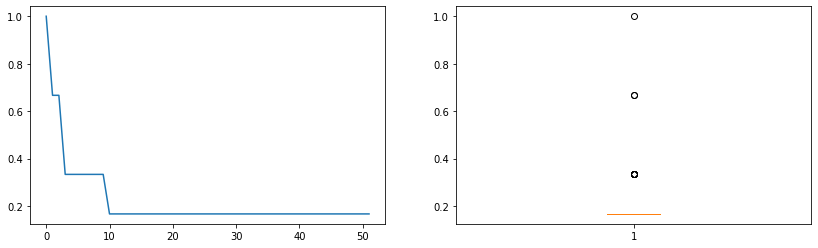

In [37]:
values_tf = [y for _, y in stats_tf]
fig, ax = plt.subplots(figsize=(14, 4), ncols=2)
ax[0].plot(values_tf)
ax[1].boxplot(values_tf)
plt.show()

### Get document frequency and calculate IDF

In [40]:
r, c = X.nonzero()
mask = list(zip(r, c))

In [41]:
mask[:2]

[(0, 0), (0, 1)]

In [42]:
B = np.zeros(X.shape)
for row, column in mask:
    B[row, column] = 1

In [47]:
B.sum(axis=0)
wlist[1]

'manzoni'

In [49]:
DF = B.sum(axis=0)

In [50]:
IDF = np.log(len(S) / DF)

In [53]:
IDF[2]

2.3153136573714264

### TF-IDF

In [54]:
TFIDF = TF * IDF

In [55]:
sentence = 3634
stats_tfidf = sentence_values(TFIDF, sentence, wlist, threshold=0)
prints(sentence, stats_tfidf)

Il mio debol parere è questo: che non è solamente nell'affare del pane che si fanno delle bricconerie: e giacché oggi s'è visto chiaro che, a farsi sentire, s'ottiene quel che è giusto; bisogna andar avanti così, fin che non si sia messo rimedio a tutte quelle altre scelleratezze, e che il mondo vada un po' più da cristiani. 

debol -> 1.42	nell'affare -> 1.42	s'ottiene -> 1.42	è -> 1.41	bricconerie -> 1.3	scelleratezze -> 1.3	cristiani -> 1.19	rimedio -> 1.03	solamente -> 1.02	vada -> 0.97	giusto -> 0.96	oggi -> 0.94	chiaro -> 0.89	parere -> 0.88	che -> 0.85	s -> 0.85	visto -> 0.84	farsi -> 0.84	fanno -> 0.83	giacché -> 0.83	sentire -> 0.82	andar -> 0.82	messo -> 0.81	bisogna -> 0.78	altre -> 0.77	fin -> 0.77	mondo -> 0.75	pane -> 0.75	avanti -> 0.73	mio -> 0.72	tutte -> 0.68	sia -> 0.66	po -> 0.63	quelle -> 0.61	' -> 0.6	si -> 0.59	delle -> 0.59	: -> 0.5	questo -> 0.49	così -> 0.47	non -> 0.44	il -> 0.41	quel -> 0.4	a -> 0.38	del -> 0.36	più -> 0.34	da -> 0.34	e -> 0.25	un -> 0.24	, 

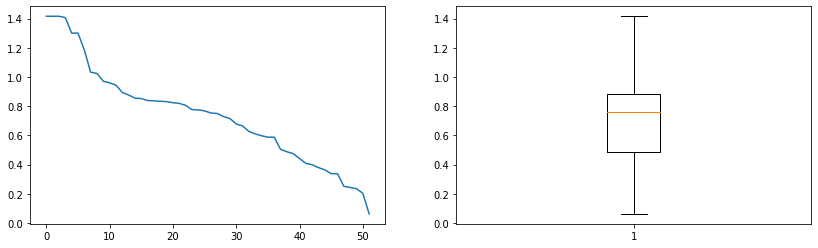

In [56]:
values_tfidf = [y for _, y in stats_tfidf]
fig, ax = plt.subplots(figsize=(14, 4), ncols=2)
ax[0].plot(values_tfidf)
ax[1].boxplot(values_tfidf)
plt.show()

### Effects on query

In [60]:
q = query('abbondio è un mio amico che usa facebook', 
          TFIDF, wlist)

In [61]:
sigma = cosine_similarity(q.reshape(1, -1), TFIDF)

In [62]:
for k, (i, s) in enumerate(sorted(enumerate(sigma[0]), key=lambda x: -x[1])):
    print(i, s)
    print(S[i])
    print('\n')
    if k > 5:
        break

652 0.3073080466252196
È il mio caso, - disse Renzo.


9195 0.2914364028851205
non è lei sempre il mio padre?


4051 0.28466599319362634
- Un visibilio.


3674 0.278314646371961
- Conosco appunto un'osteria che farà al caso vostro; e vi raccomanderò al padrone, che è mio amico, e galantuomo.


4164 0.2587377903796695
Signor mio!


8246 0.25449029907219484
- È andato via che è un pezzo.


388 0.24633525481643906
- disse don Abbondio.




In [63]:
import string

In [64]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'